# Problem Statement:
**Objective:**
To perform customer segmentation using unsupervised learning techniques on a retail dataset containing information on customers’ demographics and behaviors. The goal is to identify distinct groups of customers based on patterns in Annual Income and Spending Score, thereby enabling the business to tailor marketing strategies, offers, and product placements more effectively.

**Dataset Description:**
The dataset contains 200 entries with the following features:

 - CustomerID: Unique identifier for each customer

 - Age: Customer’s age

 - Annual Income (k$): Annual income in thousands of dollars

 - Spending Score (1–100): Score assigned by the mall based on customer spending behavior

**Motivation:**
Understanding customer segments can help improve business performance by:

 - Targeting specific segments with personalized marketing

 - Optimizing product recommendations

 - Enhancing customer retention through tailored experiences

 - Identifying potential high-value customers

**Approach:**

  - Apply clustering algorithms such as K-Means or Hierarchical Clustering

  - Use elbow method and silhouette score to determine optimal cluster count

  - Visualize clusters to interpret customer behaviors

  - Analyze each segment for actionable insights

In [48]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

In [50]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/shopping_data.csv')
df.sample(10)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocessing


In [51]:
# Analyze the Customer Behaviour only on 2 features: 'Annual Income (k$)', 'Spending Score (1-100)'
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#1. K-Mean Clustering

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25050.832307547524, 21862.09267218289, 19657.783608703947]


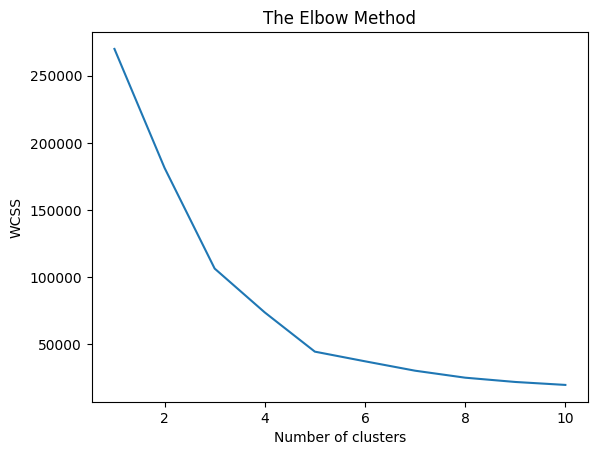

In [52]:
# Step1: Find the optimal K using Elbow Curve
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

## Plot the Elbow Curve
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [53]:
## the Elbow curve shows that the optimal cluster = 5
K = 5

In [54]:
# Step2: Build K-Means Cluster / Train the Model
kmeans_model = KMeans(n_clusters=K, init='k-means++')
kmeans_model.fit(x)


KMeans(n_clusters=5)

In [55]:
y_pred = kmeans_model.predict(x)
print(y_pred)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [56]:
# Step3: Evaluate the Model using Silhouutte Score
score = silhouette_score(x, y_pred)
print(score)

0.46238415290734225


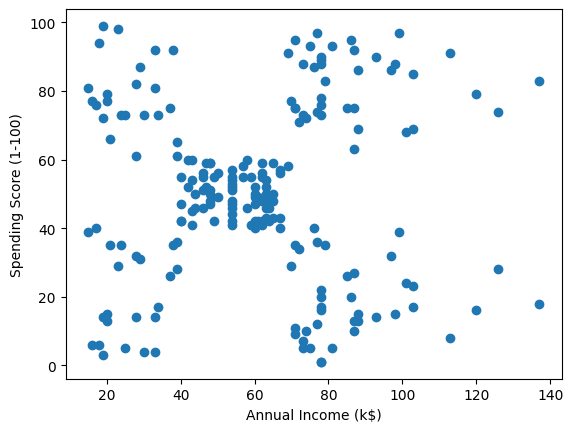

In [57]:
# Visualize the raw data (without clustering)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


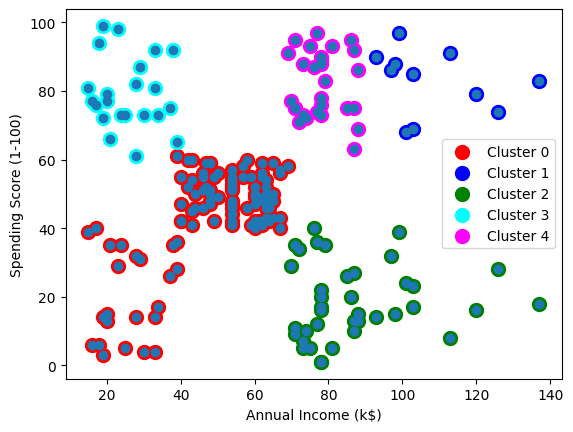

In [58]:
# Step4: Visualize the cluster (after clustering)
## Plot each cluster where prediction is between 0 and 1.
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [59]:
# Step5: Mapping cluster# to a proper label
temp=y_pred.tolist()
for i in range(len(temp)):
  if temp[i]==0:
    temp[i] = 'Low Income-Low Spend'
  elif temp[i]==1:
    temp[i] = 'High Income-High Spend'
  elif temp[i]==2:
    temp[i] = 'Low Income-High Spend'
  elif temp[i]==3:
      temp[i] = 'Mid Income-Mid Spend'
  elif temp[i]==4:
      temp[i] = 'High Income-Low Spend'

df['Cluster'] = temp
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
64,65,Male,63,48,51,Low Income-Low Spend
55,56,Male,47,43,41,Low Income-Low Spend
12,13,Female,58,20,15,Low Income-Low Spend
140,141,Female,57,75,5,Low Income-High Spend
52,53,Female,31,43,54,Low Income-Low Spend


#2. Hierarchical Clustering (Agglomerative)


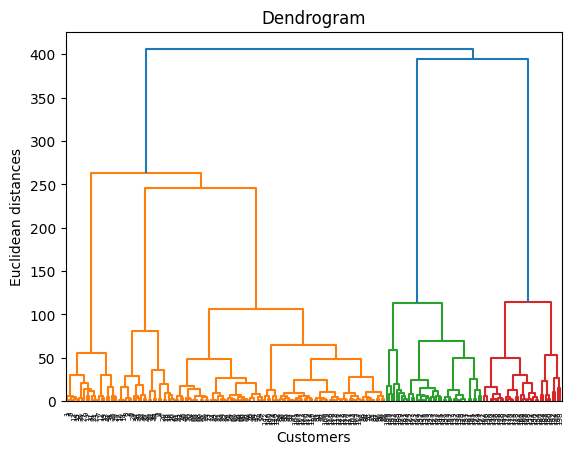

In [60]:
#Step1: Draw the Dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [61]:
# Cut the Y-axis at 50% (which is 200)
# It 50% cut in Y-axis, we get 5 clusters.
K = 5

In [62]:
# Step2: Build Hirerachical AgglomerativeClustering Cluster / Train the Model
hc_model =  AgglomerativeClustering(n_clusters=K, linkage='ward')
hc_model.fit(x)

AgglomerativeClustering(n_clusters=5)

In [63]:
y_pred = kmeans_model.predict(x)
print(y_pred)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [64]:
# Step3: Evaluate the Model using Silhouutte Score
score = silhouette_score(x, y_pred)
print(score)

0.46238415290734225


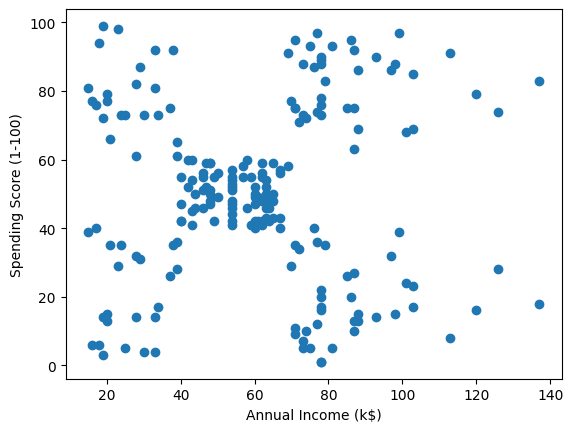

In [65]:
# Visualize the raw data (without clustering)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

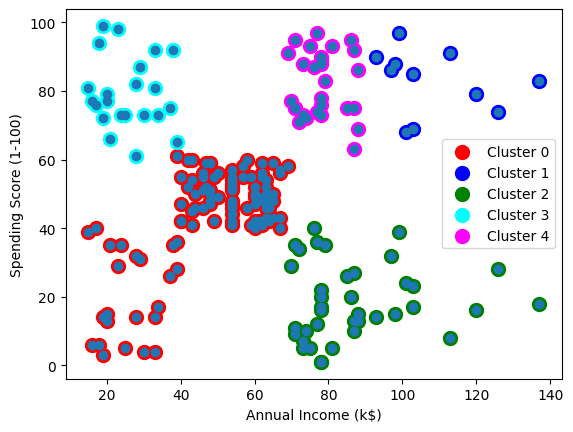

In [66]:
# Step4: Visualize the cluster (after clustering)
## Plot each cluster where prediction is between 0 and 1.
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [67]:
# Step5: Mapping cluster# to a proper label
temp=y_pred.tolist()
for i in range(len(temp)):
  if temp[i]==0:
    temp[i] = 'Low Income-Low Spend'
  elif temp[i]==1:
    temp[i] = 'High Income-High Spend'
  elif temp[i]==2:
    temp[i] = 'Low Income-High Spend'
  elif temp[i]==3:
      temp[i] = 'Mid Income-Mid Spend'
  elif temp[i]==4:
      temp[i] = 'High Income-Low Spend'

df['Cluster'] = temp
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
183,184,Female,29,98,88,High Income-High Spend
84,85,Female,21,54,57,Low Income-Low Spend
196,197,Female,45,126,28,Low Income-High Spend
13,14,Female,24,20,77,Mid Income-Mid Spend
43,44,Female,31,39,61,Low Income-Low Spend
